In [1]:
import pandas as pd

# Read the Excel file
data = pd.read_excel(r"C:\Users\ACER\Budget.xlsx")

In [2]:
column_mapping = {
    'AdventureWorks Budget Data': 'Category',
    'Unnamed: 1': 'Subcategory',
    'Unnamed: 2': 'ProductName',
    'Unnamed: 3': 'ProductKey',
    'Unnamed: 4': 'Jan, 2016',
    'Unnamed: 5': 'Feb, 2016',
    'Unnamed: 6': 'Mar, 2016',
    'Unnamed: 7': 'Apr, 2016',
    'Unnamed: 8': 'May, 2016',
    'Unnamed: 9': 'Jun, 2016',
    'Unnamed: 10': 'Jul, 2016',
    'Unnamed: 11': 'Aug, 2016',
    'Unnamed: 12': 'Sep, 2016',
    'Unnamed: 13': 'Oct, 2016',
    'Unnamed: 14': 'Nov, 2016',
    'Unnamed: 15': 'Dec, 2016',
    'Unnamed: 16': 'Grand Total',
    # Add more mappings as needed
}

# Rename the columns using the dictionary
data = data.rename(columns=column_mapping)

In [3]:
data = data.drop(range(3))

# Reset the index after dropping rows
data = data.reset_index(drop=True)

In [4]:
data.dropna()
data.fillna(0, inplace=True)

In [5]:
# Extract sales and budget columns
sales_columns = ['Jan, 2016', 'Feb, 2016', 'Mar, 2016', 'Apr, 2016', 'May, 2016', 'Jun, 2016', 'Jul, 2016', 'Aug, 2016', 'Sep, 2016', 'Oct, 2016', 'Nov, 2016', 'Dec, 2016']
budget_column = 'Grand Total'  # Assuming 'Grand Total' represents the budget for the year

sales = data[sales_columns].sum(axis=1)  # Summing sales across all months for each product
budget = data[budget_column]

# Calculate variance
variance = sales - budget

# Create a DataFrame to store sales, budget, and variance
result_df = pd.DataFrame({
    'ProductName': data['ProductName'],
    'Sales': sales,
    'Budget': budget,
    'Variance': variance
})

# Display the result DataFrame
print(result_df)

# If you want to save the result to a new Excel file
# result_df.to_excel('Sales_Budget_Variance.xlsx', index=False)

                   ProductName     Sales    Budget  Variance
0          Hitch Rack - 4-Bike     36861     36861         0
1       All-Purpose Bike Stand     38757     38757         0
2        Water Bottle - 30 oz.     57369     57369         0
3        Bike Wash - Dissolver      6465      6465         0
4        Fender Set - Mountain     43670     43670         0
5        Sport-100 Helmet, Red    221905    221905         0
6      Hydration Pack - 70 oz.     39803     39803         0
7          Patch Kit/8 Patches    242777    242777         0
8                            0    687607    687607         0
9      Mountain-100 Silver, 38   6534364   6534364         0
10            Road-150 Red, 62   5257897   5257897         0
11       Touring-2000 Blue, 60   4055965   4055965         0
12                           0  15848226  15848226         0
13                AWC Logo Cap     20371     20371         0
14       Half-Finger Gloves, S     33965     33965         0
15  Long-Sleeve Logo Jer

C:\Users\ACER\AppData\Local\Temp\ipykernel_5860\3691497790.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\ACER\AppData\Local\Temp\ipykernel_5860\3691497790.py:25: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


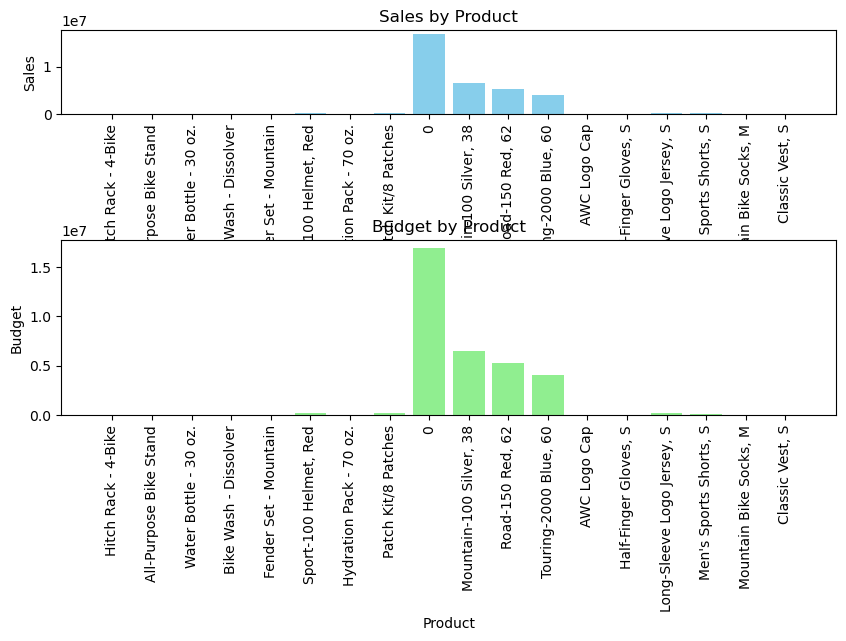

In [6]:
import matplotlib.pyplot as plt

# Convert ProductName to string
result_df['ProductName'] = result_df['ProductName'].astype(str)

# Visualize
plt.figure(figsize=(10, 5))

# Bar plot for Sales
plt.subplot(4, 1, 1)
plt.bar(result_df['ProductName'], result_df['Sales'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Sales by Product')
plt.xticks(rotation=90)
plt.tight_layout()

# Bar plot for Budget
plt.subplot(2, 1, 2)
plt.bar(result_df['ProductName'], result_df['Budget'], color='lightgreen')
plt.xlabel('Product')
plt.ylabel('Budget')
plt.title('Budget by Product')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()